# Spaceship Titanic
**Predict which passengers are transported to an alternate dimension**
- **ML model created by Marlon Viasus**
- TensorFlow Decision Forest
- Data obtained from: https://www.kaggle.com/competitions/spaceship-titanic/data

**Importamos todas las librerias necesarias y revisamos la version de TensorFlow y TFDF**

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.13.1
TensorFlow Decision Forests v1.5.0


**Importando el dataset y revisando la cantidad de filas y columnas**

In [ ]:
import pandas as pd
train_data = pd.read_csv('/data/workspace_files/Spaceship Titanic/train.csv')
print("Full train dataset shape is {}".format(train_data.shape))

Full train dataset shape is (8693, 14)


In [ ]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Train data EDA

Eliminamos las columnas 'PassengerId' y 'Name' debido a que no aportan informacion relevante para el entrenamiento del modelo

In [ ]:
train_data = train_data.drop(['PassengerId', 'Name'], axis=1)
train_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


Revisamos la cantidad de datos faltantes que  tiene cada columna

In [ ]:
train_data.isnull().sum().sort_values(ascending=False)

CryoSleep 217
ShoppingMall 208
VIP 203
HomePlanet 201
Cabin 199
VRDeck 188
FoodCourt 183
Spa 183
Destination 182
RoomService 181
Age 179
Transported 0
dtype: int64

**Debido a que TF-DF no soporta boolean convertimos las columnas que tengan boolean en int**

Rellenaremos los datos Na con cero

In [ ]:
train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
train_data.isnull().sum().sort_values(ascending=False)

HomePlanet 201
Cabin 199
Destination 182
RoomService 181
Age 179
CryoSleep 0
VIP 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Transported 0
dtype: int64

In [ ]:
label = "Transported"
train_data[label] = train_data[label].astype(int)

In [ ]:
train_data['VIP'] = train_data['VIP'].astype(int)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)

Dividimos los datos de la columna 'Cabin' en un split de 3

In [ ]:
train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)

Ahora hacemos un drop de la columna 'Cabin' debido que ya no es necesaria

In [ ]:
dataset_df = train_data.drop('Cabin', axis=1,inplace=True)
train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S


**Ahora hacemos un split de los datos de entrenamiento y los de validacion (20%)**

In [ ]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train_data)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6948 examples in training, 1745 examples in testing.


**Convertimos el train_data de pd.DataFrame a tf.data.Dataset**

In [ ]:
import tensorflow_decision_forests as tfdf
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

**Eligiendo el modelo**

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

# TFDF con RandomForestModel

Segun el contenido de nuestro dataset, considero que TFDF con RandomForestModel es el mejor para entrenar el modelo

**Creacion del modelo**

In [ ]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpjai4td03 as temporary training directory


Definimos el 'accuracy' como medida para evaluar el modelo

In [ ]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])

Use /tmp/tmp69hp0k0u as temporary training directory


Entrenamos nuestro modelo con nuestro dataset de train

In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.531419. Found 6948 examples.
Training model...
Model trained in 0:01:14.012061
Compiling model...
Model compiled.


Obtenemos una referencia grafica superficial de nuesto arbol de decisiones

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

Los registros de entrenamiento muestran la precisión evaluada en el conjunto de datos fuera de los datos de validacion (out of bag) en función del número de árboles del modelo, por lo que vamos a representarlo gráficamente

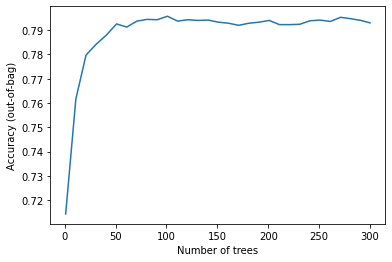

In [ ]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

Podemos ver mas informacion adicional acerca de las estadisticas del set out of bag (OOB)

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6948, accuracy=0.7930339666090962, loss=0.5364584511634666, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

**Procedemos a evaluar el modelo con el set de validacion**

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - accuracy: 0.8103
loss: 0.0000
accuracy: 0.8103


Vemos las variables importantes disponibles

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


Obtenemos las variables mas importantes para el modelo

In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 126.0),
 ("RoomService" (1; #7), 59.0),
 ("Spa" (1; #10), 54.0),
 ("VRDeck" (1; #12), 26.0),
 ("ShoppingMall" (1; #8), 24.0),
 ("FoodCourt" (1; #5), 11.0)]

**Vemos que 'CryoSleep' es la variable mas importante para el arbol de decisiones**

# Evaluando el modelo con el conjunto de datos test objetivo

In [ ]:
import pandas as pd

# Importando test dataset
test_df = pd.read_csv('/data/workspace_files/Spaceship Titanic/test.csv')
submission_id = test_df.PassengerId

# Reemplazando valores con cero
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(value=0)

# Separando los valores de Cabin
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df = test_df.drop('Cabin', axis=1)

# Convirtiendo booleans en int
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

# Convirtiendo pd dataframe a tf dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Obteniendo predicciones para testdata
predictions = rf.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

5/5 [==============================] - 0s 60ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
